In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig_width_pt = 3*246.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width,fig_height]

params = { 'axes.labelsize': 24,
          'font.family': 'serif',
          'font.serif': 'Computer Modern Raman',
          'font.size': 24,
          'legend.fontsize': 20,
          'xtick.labelsize': 24,
          'ytick.labelsize': 24,
          'axes.grid' : True,
          'text.usetex': True,
          'savefig.dpi' : 100,
          'lines.markersize' : 14,
          'figure.figsize': fig_size}

mpl.rcParams.update(params)

In [2]:
import lal
import lalsimulation as lalsim
import numpy as np

In [3]:
longAscNodes = 0
eccentricity = 0 
meanPerAno = 0
approx=lalsim.IMRPhenomPv2

nonGRdict = lal.CreateDict()

m1 = 30
m2 = 30

s1 = [0,0,0]#[0.4,-0.2,0.43]
s2 = [0,0,0]#[-0.1,0.8,0]
dist = 40.
#iota = np.pi*0.4
iota = 20.*np.pi/180.
phi_c = 0.
T = 256.
deltaF = 1./T
f_high = 4096 ## f_LSO rounded to powers of two
Fs = 2*f_high
deltaT = 1./Fs
f_ref = 20.
f_low = 9.

hplus, hcross = lalsim.SimInspiralChooseFDWaveform(m1 * lal.MSUN_SI, m2 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)
hp = hplus.data.data
hc = hcross.data.data

#h1 = h1[int(flow/df):]
#h2 = h2[int(flow/df):]
#freqs = np.arange(flow, fhigh + df, df)
freqs = np.arange(0,f_high+deltaF,deltaF)

# Massive Graviton Injection

In [4]:
lalsim.SimInspiralWaveformParamsInsertNonGRMassiveGravitonLambda(nonGRdict,1.e16)

0

In [5]:
hplus_mg, hcross_mg = lalsim.SimInspiralChooseFDWaveform(30 * lal.MSUN_SI, 30 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)

/home/astro/software/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


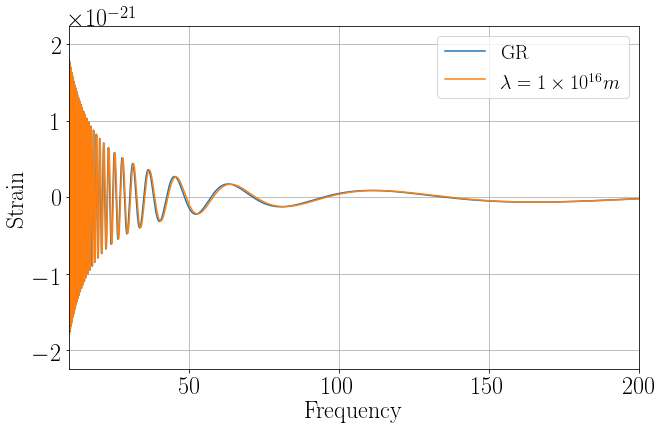

In [6]:
plt.figure()
plt.xlim(10,200)
#plt.ylim(1e-23,1e-20)
plt.ylabel('Strain')
plt.xlabel('Frequency') 
#plt.plot(freqs,np.absolute(hp),label='no massiveG injection')
#plt.plot(freqs,np.absolute(hplus_mg.data.data),label='massiveG injection 1e13')
#plt.xscale('log')
#plt.yscale('log')
plt.plot(freqs,hp,label='GR')
plt.plot(freqs,hplus_mg.data.data,label=r'$\lambda = 1\times 10^{16} m$')
plt.legend()
plt.show()

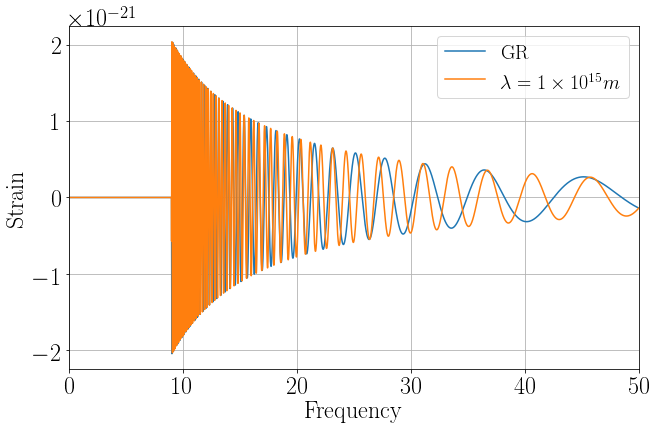

In [7]:
lalsim.SimInspiralWaveformParamsInsertNonGRMassiveGravitonLambda(nonGRdict,1.e15)
hplus_mg, hcross_mg = lalsim.SimInspiralChooseFDWaveform(30 * lal.MSUN_SI, 30 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)
plt.figure()
plt.xlim(0,50)
plt.ylabel('Strain')
plt.xlabel('Frequency') 
plt.plot(freqs,hp,label='GR')
plt.plot(freqs,hplus_mg.data.data,label=r'$\lambda = 1\times 10^{15} m$')
plt.legend()
plt.show()

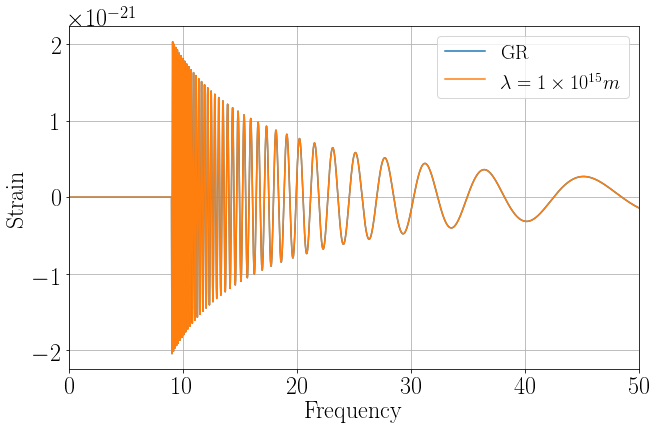

In [8]:
lalsim.SimInspiralWaveformParamsInsertNonGRMassiveGravitonLambda(nonGRdict,0)
hplus_mg, hcross_mg = lalsim.SimInspiralChooseFDWaveform(30 * lal.MSUN_SI, 30 * lal.MSUN_SI,\
                                                          s1[0], s1[1], s1[2],\
                                                          s2[0], s2[1], s2[2],\
                                                          dist * 1e6 * lal.PC_SI, iota, phi_c,\
                                                          longAscNodes, eccentricity, meanPerAno,
                                                          deltaF, f_low, f_high, f_ref,\
                                                          nonGRdict, approx)
plt.figure()
plt.xlim(0,50)
plt.ylabel('Strain')
plt.xlabel('Frequency') 
plt.plot(freqs,hp,label='GR')
plt.plot(freqs,hplus_mg.data.data,label=r'$\lambda = 1\times 10^{15} m$')
plt.legend()
plt.show()